In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mini-house-price-data-set/minihomeprices.csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
df= pd.read_csv("/kaggle/input/mini-house-price-data-set/minihomeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [45]:
df=df.drop(['bedrooms','age'],axis='columns')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,595000
4,4000,760000
5,4100,810000


Text(0, 0.5, 'price')

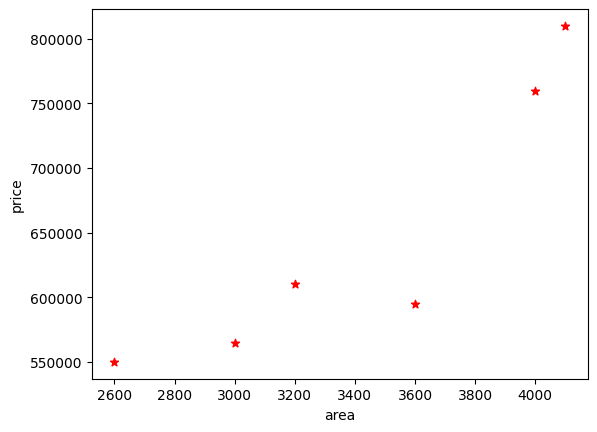

In [46]:
plt.scatter(df.area,df.price,marker='*',color='red')
plt.xlabel('area')
plt.ylabel('price')

In [47]:
from sklearn import linear_model
model=linear_model.LinearRegression()
# model.fit(df.area.values.reshape(-1,1),df.price)
model.fit(df[['area']],df.price)


LinearRegression()

In [48]:
model.predict([[3200]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([612082.93153327])

In [49]:
Y=model.predict(df[['area']])
Y

array([511697.20347155, 578621.02217936, 612082.93153327, 679006.75024108,
       745930.56894889, 762661.52362584])

In [50]:
df['Y']=Y
df

,area,price,Y
0,2600,550000,511697.203472
1,3000,565000,578621.022179
2,3200,610000,612082.931533
3,3600,595000,679006.750241
4,4000,760000,745930.568949
5,4100,810000,762661.523626


In [51]:
m=model.coef_
c=model.intercept_
y=m*3200+c
y

array([612082.93153327])

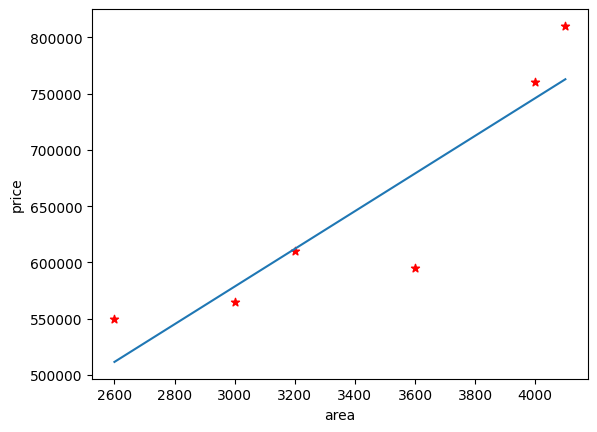

In [52]:
plt.scatter(df.area,df.price,marker='*',color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df.area,Y)

In [53]:
model.score(df[['area']],df.price)

0.8126597526459414

In [59]:
df2=pd.read_csv("/kaggle/input/mini-house-price-data-set/minihomeprices.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [61]:
mdn=df2.bedrooms.median()
mdn
df2.bedrooms=df2.bedrooms.fillna(mdn)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [63]:
model.fit(df2[['area','bedrooms','age']],df2.price)
model.predict([[2900,4.0,15]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([591383.83517986])

In [64]:
Y2=model.predict(df2[['area','bedrooms','age']])
df2['Y']=Y2
df2

,area,bedrooms,age,price,Y
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755
5,4100,6.0,8,810000,795258.551027
